In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.io.wavfile as wavfile
from scipy import signal
import torch
import librosa
import urllib.request
import scipy.io.wavfile as wavfile
from IPython.display import Audio
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Wav2Vec2ForSequenceClassification, AutoFeatureExtractor
from transformers import VitsTokenizer, VitsModel, set_seed
from transformers import Wav2Vec2ForCTC, AutoProcessor



In [40]:
def custom_spectrogram(audio_file, sample_rate=16000, n_fft=2048, hop_length=512, window='hann', win_length=None):
    sample_rate, samples = wavfile.read(audio_file)
    if win_length is None:
        win_length = n_fft
    win = signal.get_window(window, win_length)

    if len(win) != win_length:
        win = signal.get_window(window, win_length, fftbins=True)

    num_frames = 1 + (len(samples) - n_fft) // hop_length

    spectrogram = np.zeros((n_fft // 2 + 1, num_frames), dtype=np.complex128)

    for i in range(num_frames):
        start = i * hop_length
        end = start + n_fft
        frame = samples[start:end] * win
        spectrogram[:, i] = np.fft.fft(frame, n_fft)[:n_fft // 2 + 1]


    spectrogram = np.abs(spectrogram)

    return spectrogram, sample_rate

spectrogram_a,_ = custom_spectrogram("/content/question1.wav")


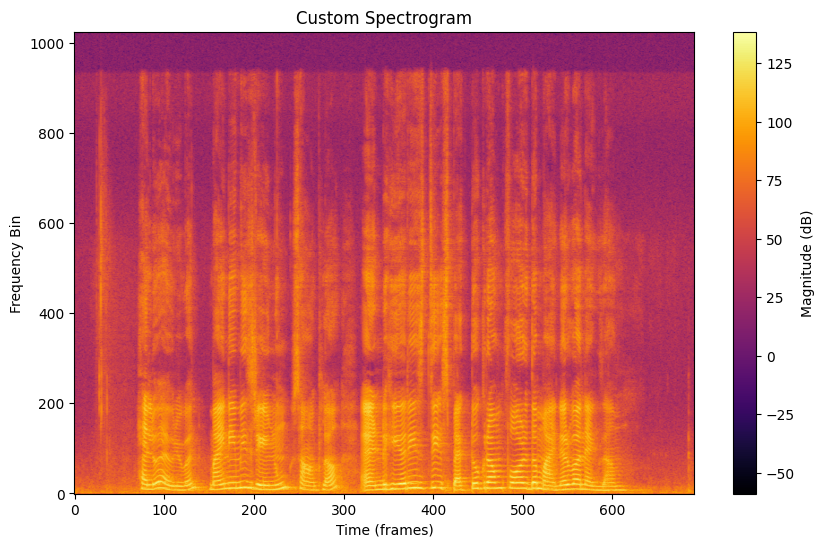

In [41]:

plt.figure(figsize=(10, 6))
plt.imshow(20 * np.log10(spectrogram_a), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Custom Spectrogram')
plt.show()


In [42]:
sentence = "Hello, everyone, my name is Renu Sankhla, and here is the spectrogram for the minor 1 exam."

In [43]:
tokenizer = VitsTokenizer.from_pretrained("facebook/mms-tts-eng")
model = VitsModel.from_pretrained("facebook/mms-tts-eng")

input = tokenizer(text = sentence, return_tensors ="pt")
set_seed(555)
with torch.no_grad():
  outputs = model(**input)

waveform = outputs.waveform[0]
Audio(waveform, rate = 16000)



Some weights of the model checkpoint at facebook/mms-tts-eng were not used when initializing VitsModel: ['flow.flows.3.wavenet.res_skip_layers.3.weight_v', 'posterior_encoder.wavenet.res_skip_layers.3.weight_g', 'posterior_encoder.wavenet.res_skip_layers.11.weight_v', 'posterior_encoder.wavenet.res_skip_layers.15.weight_g', 'posterior_encoder.wavenet.in_layers.10.weight_g', 'flow.flows.1.wavenet.in_layers.2.weight_v', 'flow.flows.1.wavenet.res_skip_layers.1.weight_g', 'flow.flows.3.wavenet.res_skip_layers.1.weight_v', 'flow.flows.1.wavenet.in_layers.0.weight_v', 'posterior_encoder.wavenet.in_layers.11.weight_v', 'flow.flows.2.wavenet.in_layers.3.weight_g', 'flow.flows.2.wavenet.res_skip_layers.0.weight_v', 'posterior_encoder.wavenet.in_layers.2.weight_g', 'posterior_encoder.wavenet.res_skip_layers.7.weight_v', 'flow.flows.0.wavenet.in_layers.3.weight_v', 'posterior_encoder.wavenet.in_layers.7.weight_g', 'flow.flows.0.wavenet.in_layers.1.weight_v', 'flow.flows.3.wavenet.in_layers.0.weig

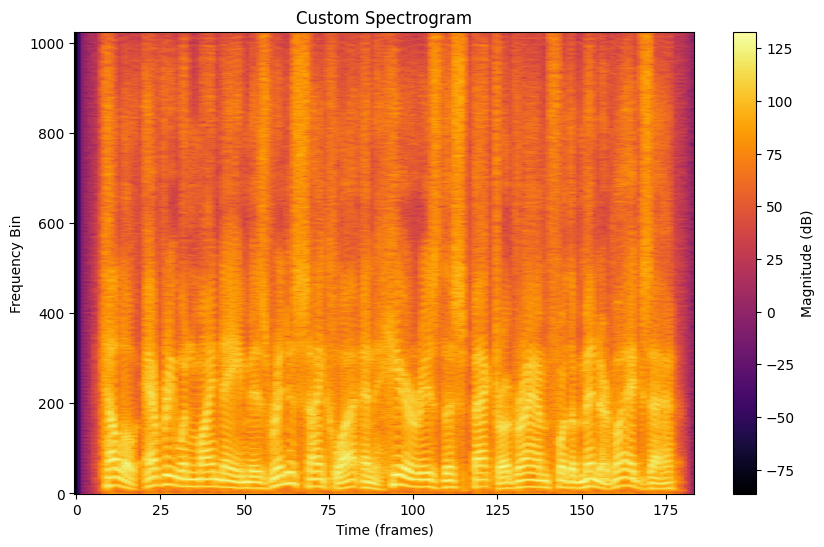

In [44]:
spectrogram_b,_ = custom_spectrogram("/content/download.wav", sample_rate= 16000)
plt.figure(figsize=(10, 6))
plt.imshow(20 * np.log10(spectrogram_b), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Custom Spectrogram')
plt.show()

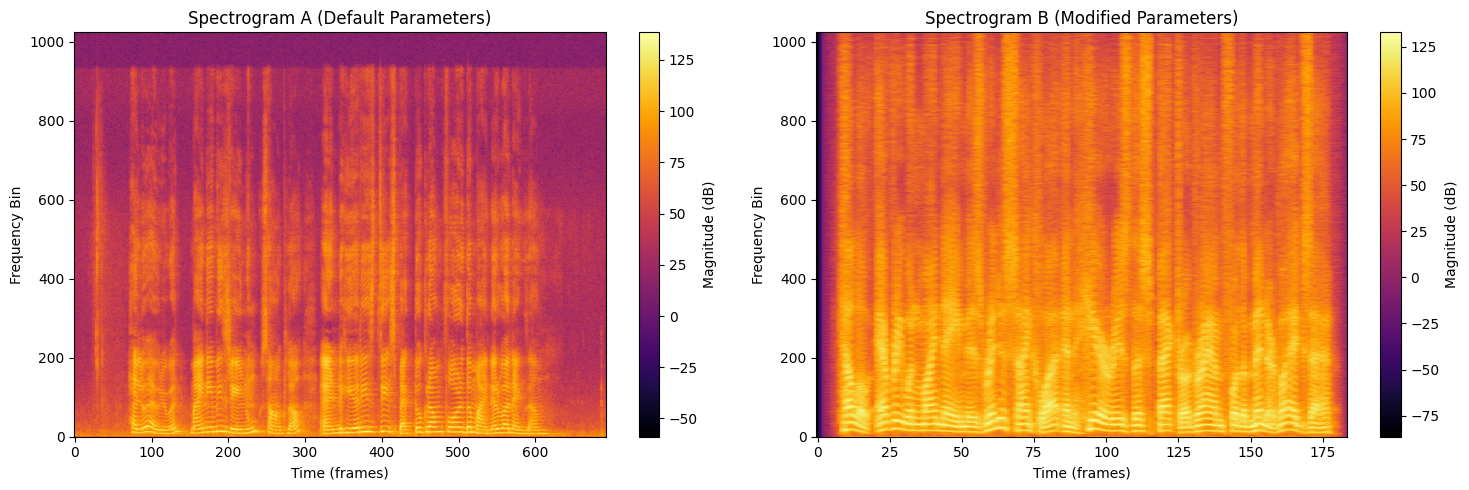

In [45]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(20 * np.log10(spectrogram_a), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram A (Default Parameters)')


plt.subplot(1, 2, 2)
plt.imshow(20 * np.log10(spectrogram_b), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram B (Modified Parameters)')

plt.tight_layout()
plt.show()

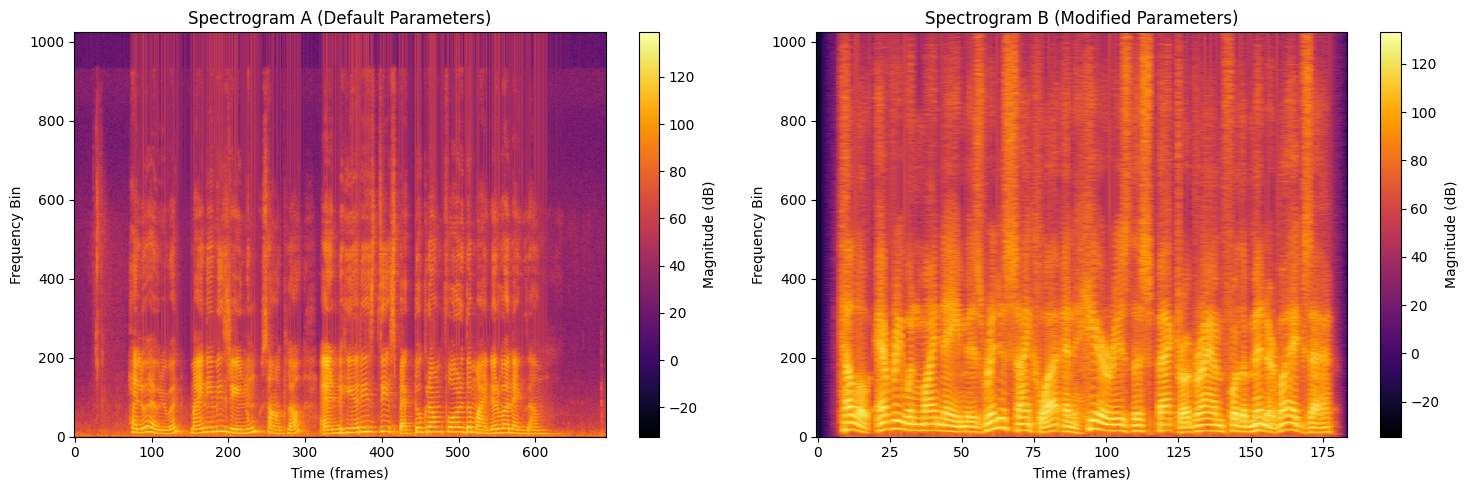

In [46]:
spectrogram_a, _ = custom_spectrogram("/content/question1.wav", window = 'hamming', n_fft=2048, hop_length=512)
spectrogram_b, _= custom_spectrogram("/content/download.wav", window = 'hamming', n_fft=2048, hop_length=512)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(20 * np.log10(spectrogram_a), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram A (Default Parameters)')


plt.subplot(1, 2, 2)
plt.imshow(20 * np.log10(spectrogram_b), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram B (Modified Parameters)')

plt.tight_layout()
plt.show()

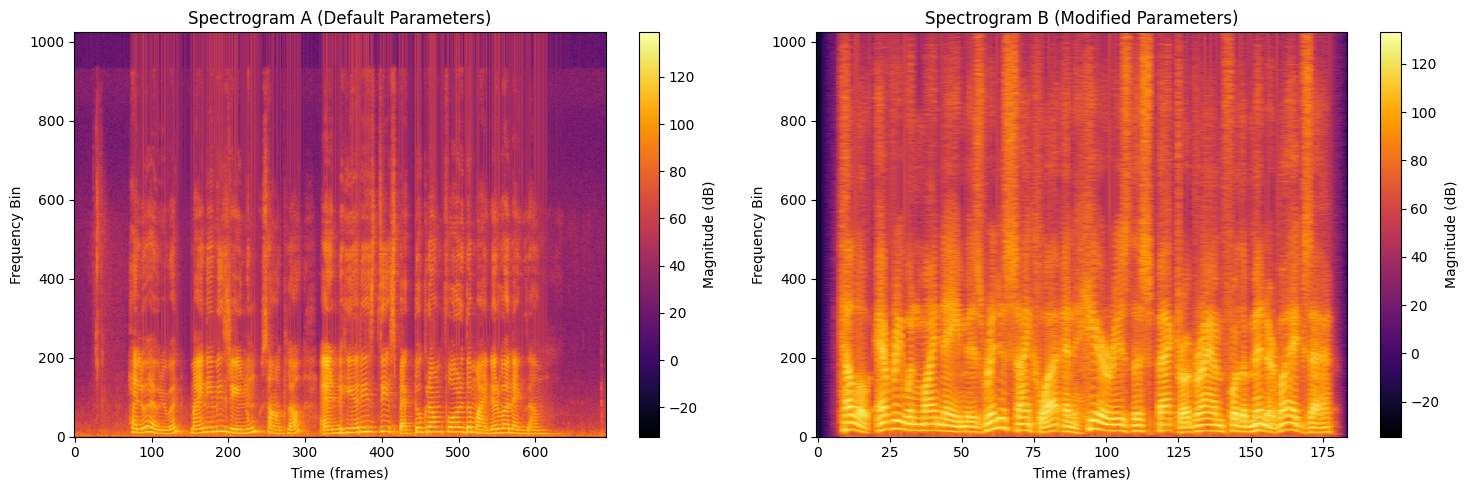

In [47]:
spectrogram_c = custom_spectrogram("/content/question1.wav", window = 'hann', n_fft= 1024, hop_length=128, win_length=1024)
spectrogram_d= custom_spectrogram("/content/download.wav",window = 'hann', n_fft=1024, hop_length=128, win_length=1024)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(20 * np.log10(spectrogram_a), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram A (Default Parameters)')


plt.subplot(1, 2, 2)
plt.imshow(20 * np.log10(spectrogram_b), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram B (Modified Parameters)')

plt.tight_layout()
plt.show()

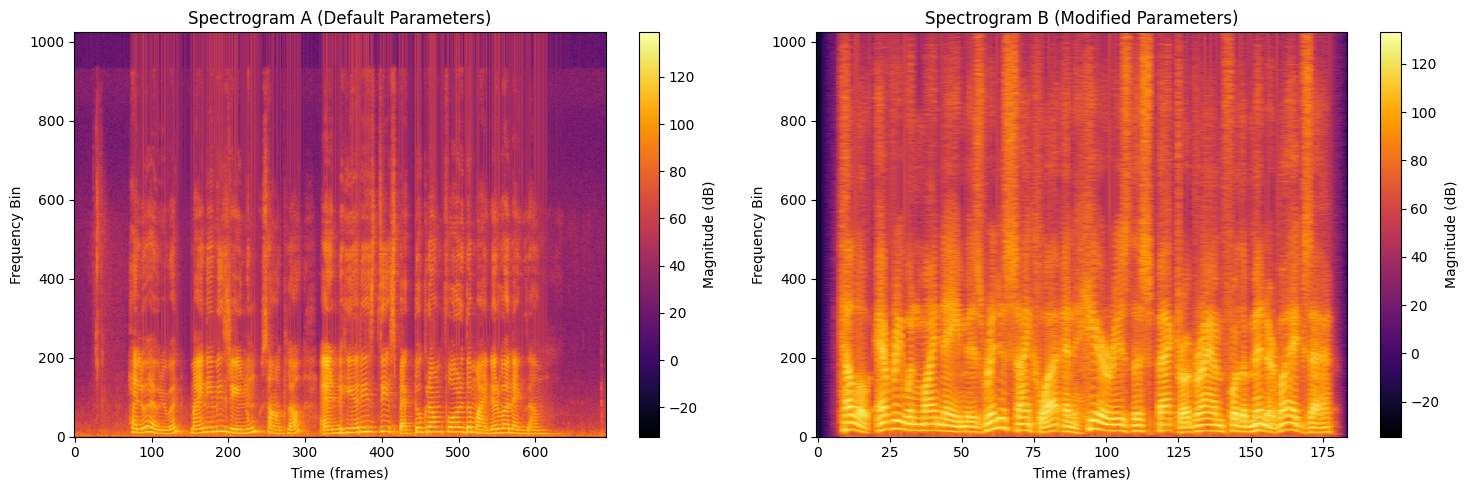

In [48]:
spectrogram_c = custom_spectrogram("/content/question1.wav", window = 'hamming', n_fft= 1024, hop_length=512, win_length=1024)
spectrogram_d= custom_spectrogram("/content/download.wav",window = 'hamming', n_fft=1024, hop_length=512, win_length=1024)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(20 * np.log10(spectrogram_a), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram A (Default Parameters)')


plt.subplot(1, 2, 2)
plt.imshow(20 * np.log10(spectrogram_b), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram B (Modified Parameters)')

plt.tight_layout()
plt.show()

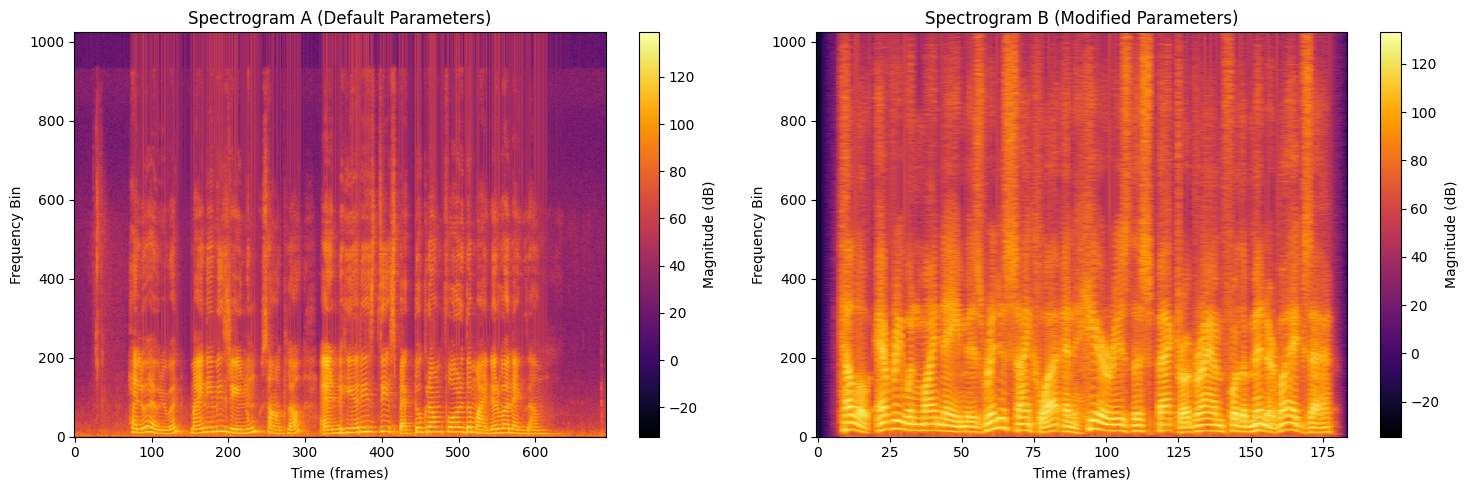

In [49]:
spectrogram_c = custom_spectrogram("/content/question1.wav", window = 'hann', n_fft= 512, hop_length=128, win_length=512)
spectrogram_d= custom_spectrogram("/content/download.wav",window = 'hann', n_fft=512, hop_length=128, win_length=512)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(20 * np.log10(spectrogram_a), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram A (Default Parameters)')


plt.subplot(1, 2, 2)
plt.imshow(20 * np.log10(spectrogram_b), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram B (Modified Parameters)')

plt.tight_layout()
plt.show()

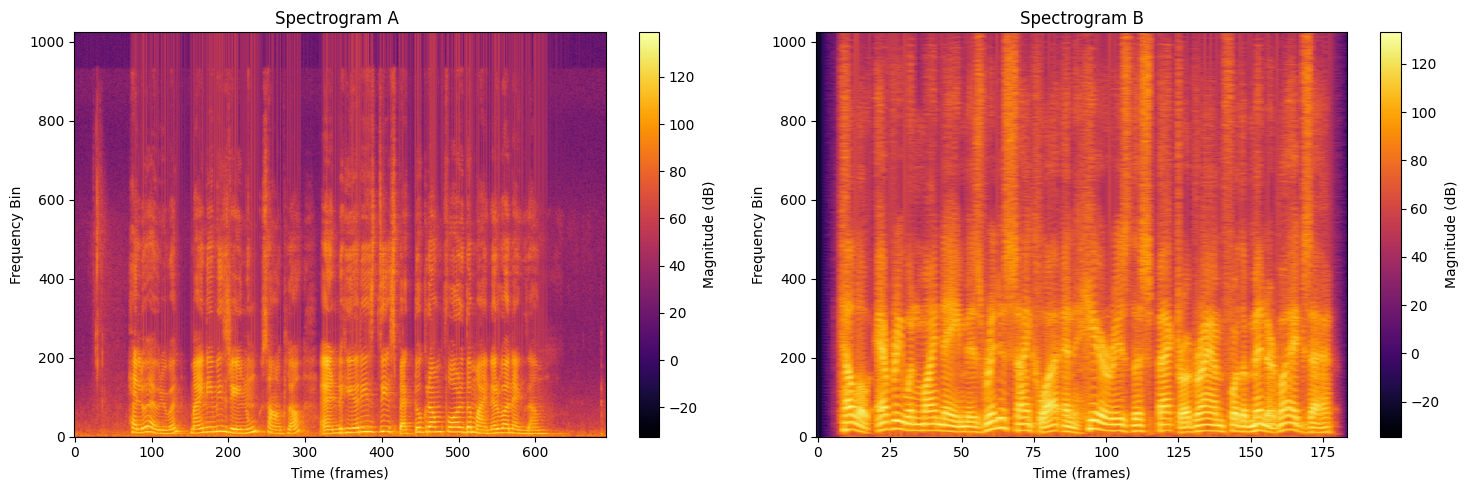

In [52]:
spectrogram_c = custom_spectrogram("/content/question1.wav", window = 'hamming', n_fft= 512, hop_length=128, win_length=512)
spectrogram_d= custom_spectrogram("/content/download.wav",window = 'hamming', n_fft=512, hop_length=128, win_length=512)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(20 * np.log10(spectrogram_a), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram A ')


plt.subplot(1, 2, 2)
plt.imshow(20 * np.log10(spectrogram_b), aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label='Magnitude (dB)')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram B')

plt.tight_layout()
plt.show()